In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
before = df[' Blood Pressure Before (mmHg)']
after = df[' Blood Pressure After (mmHg)']

In [4]:
# a. Measure the dispersion
range_before = np.max(before) - np.min(before)
range_after = np.max(after) - np.min(after)

variance_before = np.var(before, ddof=1)
variance_after = np.var(after, ddof=1)

std_dev_before = np.std(before, ddof=1)
std_dev_after = np.std(after, ddof=1)

In [5]:
print("Dispersion:")
print("Range (Blood Pressure Before):", range_before)
print("Range (Blood Pressure After):", range_after)
print("Variance (Blood Pressure Before):", variance_before)
print("Variance (Blood Pressure After):", variance_after)
print("Standard Deviation (Blood Pressure Before):", std_dev_before)
print("Standard Deviation (Blood Pressure After):", std_dev_after)

Dispersion:
Range (Blood Pressure Before): 28
Range (Blood Pressure After): 23
Variance (Blood Pressure Before): 43.53727272727271
Variance (Blood Pressure After): 47.4448484848485
Standard Deviation (Blood Pressure Before): 6.598278012275075
Standard Deviation (Blood Pressure After): 6.8880221025232276


**Interpretation:**
- The range represents the spread between the minimum and maximum values. In this case, the range is smaller for 'Blood Pressure After' (22 mmHg) compared to 'Blood Pressure Before' (28 mmHg), indicating less variability or a narrower range of values after the treatment or intervention.

- The variance and standard deviation provide a measure of the dispersion of data points around the mean. Smaller values indicate less dispersion or more clustered data. Comparing the variance and standard deviation, we can see that 'Blood Pressure After' has a smaller variance and standard deviation compared to 'Blood Pressure Before,' further supporting the interpretation that there is less variability in 'Blood Pressure After' values.



In [6]:
# b. Calculate mean and 5% confidence interval
mean_before = np.mean(before)
mean_after = np.mean(after)

std_error_before = std_dev_before / np.sqrt(len(before))
std_error_after = std_dev_after / np.sqrt(len(after))

critical_value = stats.t.ppf(0.975, df=len(before)-1)  # Two-tailed, alpha=0.05

confidence_interval_before = (mean_before - critical_value * std_error_before,
                              mean_before + critical_value * std_error_before)
confidence_interval_after = (mean_after - critical_value * std_error_after,
                             mean_after + critical_value * std_error_after)


In [11]:
print("Mean and Confidence Interval:")
print("Mean (Blood Pressure Before):", mean_before)
print("Confidence Interval (Blood Pressure Before):", confidence_interval_before)
print("Mean (Blood Pressure After):", mean_after)
print("Confidence Interval (Blood Pressure After):", confidence_interval_after)

Mean and Confidence Interval:
Mean (Blood Pressure Before): 133.91
Confidence Interval (Blood Pressure Before): (132.60075849172767, 135.21924150827232)
Mean (Blood Pressure After): 128.36
Confidence Interval (Blood Pressure After): (126.99326697818071, 129.7267330218193)


Text(0.5, 1.0, 'Mean Blood Pressure Before and After')

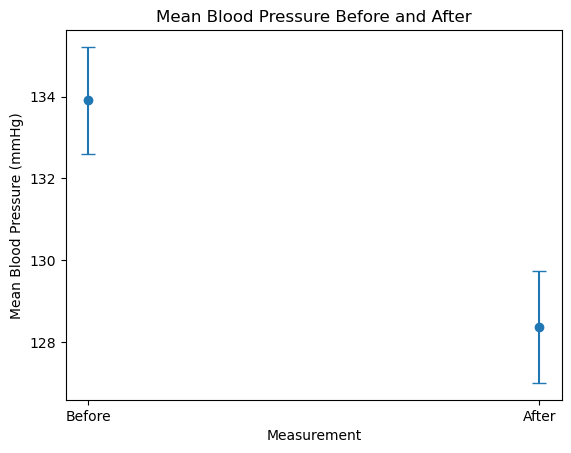

In [9]:
# Create the plot
plt.errorbar(['Before', 'After'], [mean_before, mean_after], yerr=[confidence_interval_before[1]-mean_before, confidence_interval_after[1]-mean_after], fmt='o', capsize=5)
plt.xlabel('Measurement')
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.title('Mean Blood Pressure Before and After')

**Interpretation**
- The error bars do not overlap, it indicates that there may be a significant difference between the mean blood pressure values before and after the intervention.

In [10]:
# c. Calculate Mean absolute deviation and Standard deviation
mad_before = np.mean(np.abs(before - mean_before))
mad_after = np.mean(np.abs(after - mean_after))

In [11]:
print("Mean Absolute Deviation:")
print("MAD (Blood Pressure Before):", mad_before)
print("MAD (Blood Pressure After):", mad_after)
print("Standard Deviation (Blood Pressure Before):", std_dev_before)
print("Standard Deviation (Blood Pressure After):", std_dev_after)


Mean Absolute Deviation:
MAD (Blood Pressure Before): 5.7118
MAD (Blood Pressure After): 5.9
Standard Deviation (Blood Pressure Before): 6.598278012275075
Standard Deviation (Blood Pressure After): 6.8880221025232276


In [12]:
# d. Calculate the correlation coefficient and check significance at 1% level
corr_coef, p_value = stats.pearsonr(before, after)
significant = p_value < 0.01

In [13]:
print("Correlation Coefficient and Significance:")
print("Correlation Coefficient:", corr_coef)
print("Significant at 1% level:", significant)

Correlation Coefficient and Significance:
Correlation Coefficient: 0.9779485966556027
Significant at 1% level: True
